<a href="https://colab.research.google.com/github/AnitaTasnim/LLM-projects/blob/main/LLM_Text_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk
from nltk import bigrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import pandas as pd
nltk.download('stopwords')
nltk.download('wordnet')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
test_essays_path = '/kaggle/input/llm-detect-ai-generated-text/test_essays.csv'
train_essays_path = '/kaggle/input/llm-detect-ai-generated-text/train_essays.csv'
train_prompts_path = '/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv'

In [ ]:
test_essays = pd.read_csv(test_essays_path)
train_essays = pd.read_csv(train_essays_path)
train_prompts = pd.read_csv(train_prompts_path)

In [ ]:
test_essays_head = test_essays.head()
train_essays_head = train_essays.head()
train_prompts_head = train_prompts.head()

test_essays_head, train_essays_head, train_prompts_head

(         id  prompt_id          text
 0  0000aaaa          2  Aaa bbb ccc.
 1  1111bbbb          3  Bbb ccc ddd.
 2  2222cccc          4  CCC ddd eee.,
          id  prompt_id                                               text  \
 0  0059830c          0  Cars. Cars have been around since they became ...   
 1  005db917          0  Transportation is a large necessity in most co...   
 2  008f63e3          0  "America's love affair with it's vehicles seem...   
 3  00940276          0  How often do you ride in a car? Do you drive a...   
 4  00c39458          0  Cars are a wonderful thing. They are perhaps o...   
 
    generated  
 0          0  
 1          0  
 2          0  
 3          0  
 4          0  ,
    prompt_id                       prompt_name  \
 0          0                   Car-free cities   
 1          1  Does the electoral college work?   
 
                                         instructions  \
 0  Write an explanatory essay to inform fellow ci...   
 1  Write a

In [ ]:
import string

def simplified_clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    words = text.split()
    text = ' '.join(words)
    return text
train_essays_sample = train_essays['text'].sample(n=5).apply(simplified_clean_text)
train_essays_sample


160    we live in a world where we rely on cars to ge...
679    electoral college is where we pick our state e...
24     dear florida state senator although many could...
27     there are many different things that you could...
946    dear senator i am writing to you to argue in f...
Name: text, dtype: object

In [ ]:
import pandas as pd
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    return text
train_essays_sample = train_essays['text'].sample(n=5).apply(clean_text)
train_essays_sample

1078    dear senator electoral college unfair outdated...
320     many problems world facing right pointed back ...
1272    dear state senator strongly believe keeping el...
1303    limiting car usage bad benefits everyone speci...
624     electoral college good thing certainly messes ...
Name: text, dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


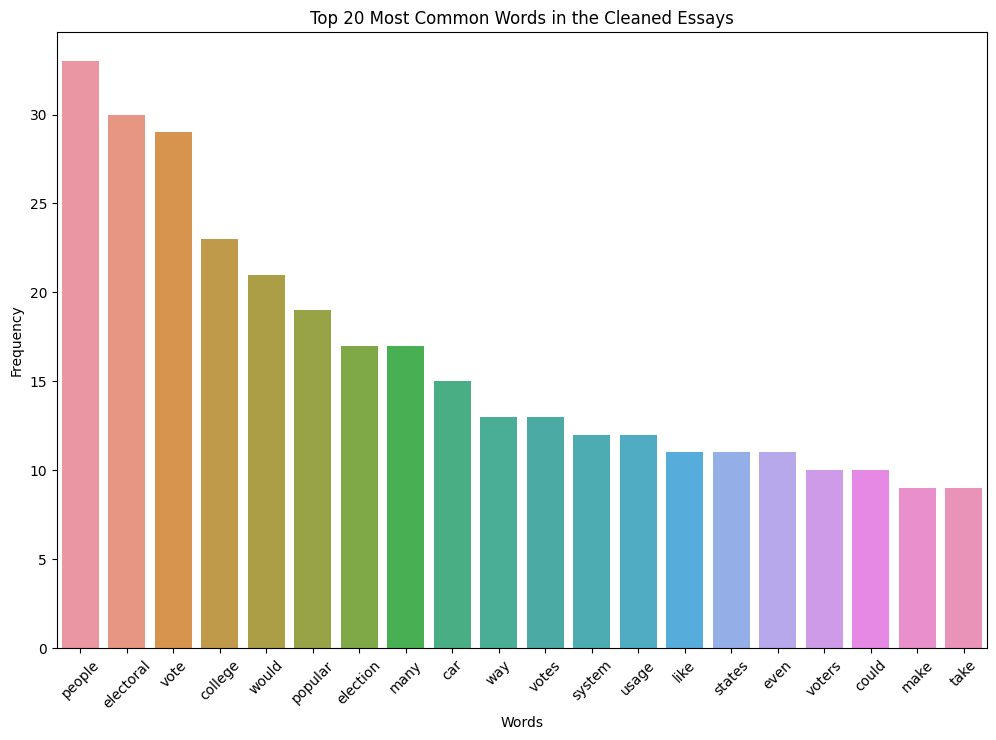

In [ ]:
all_cleaned_text = ' '.join(train_essays_sample)
word_freq = Counter(all_cleaned_text.split())
most_common_words = word_freq.most_common(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in the Cleaned Essays')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

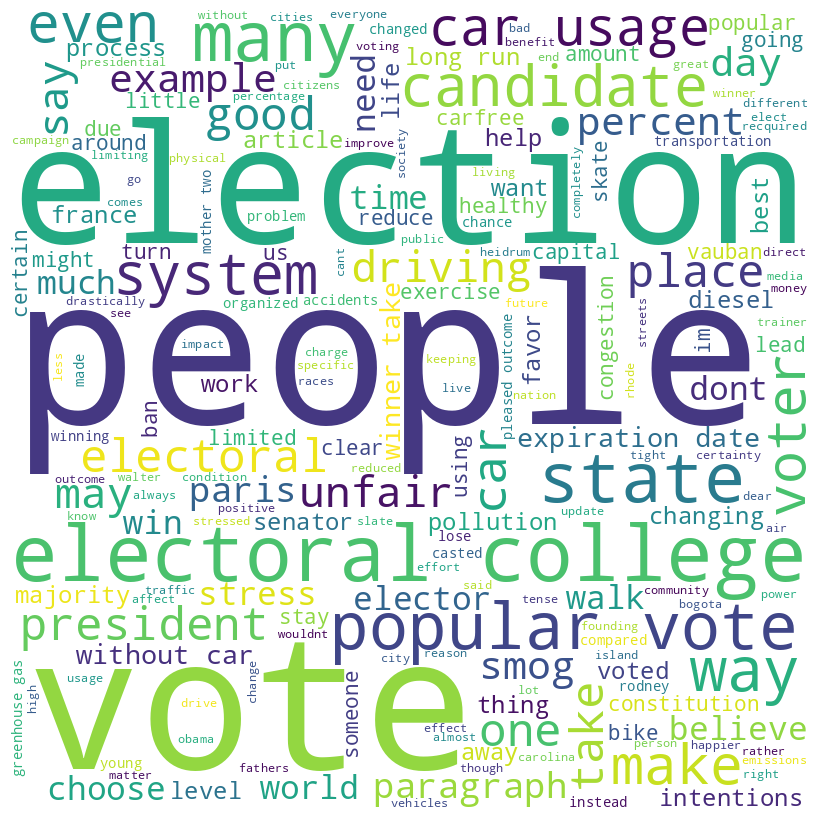

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(all_cleaned_text)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

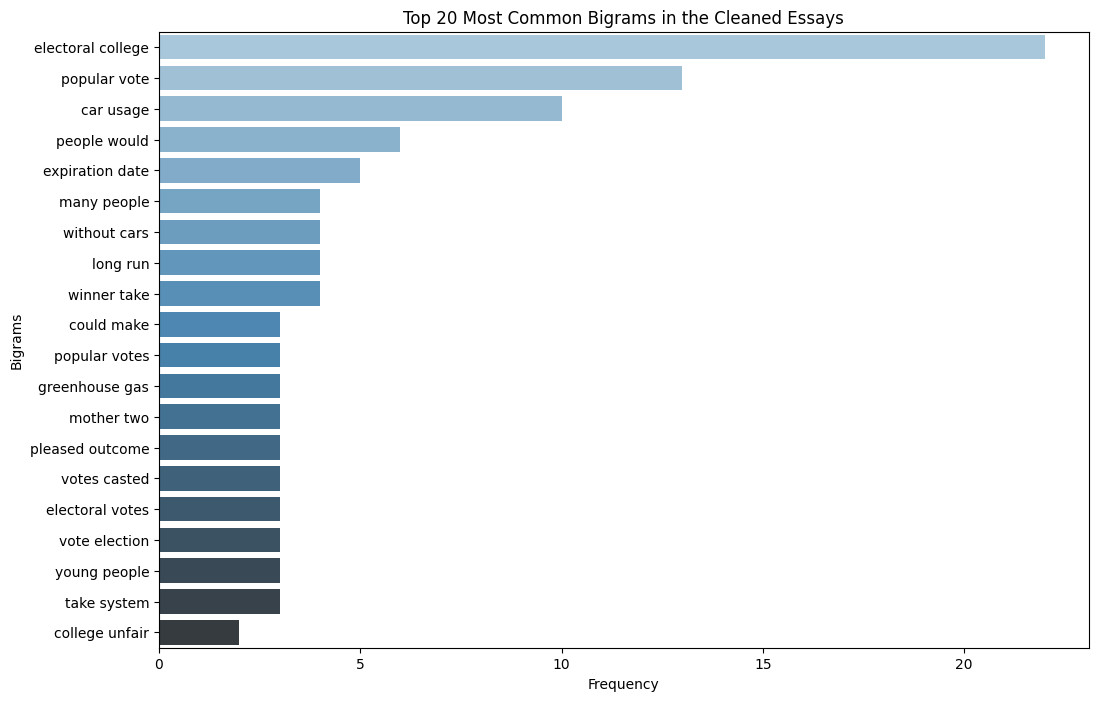

In [ ]:
bigram_list = list(bigrams(all_cleaned_text.split()))
bigram_freq = Counter(bigram_list)
most_common_bigrams = bigram_freq.most_common(20)
bigram_strings = [' '.join(bigram) for bigram, count in most_common_bigrams]
counts = [count for bigram, count in most_common_bigrams]
bigram_df = pd.DataFrame({'Bigram': bigram_strings, 'Count': counts})
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Bigram', data=bigram_df, palette="Blues_d")
plt.title('Top 20 Most Common Bigrams in the Cleaned Essays')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()


#  VADER (Valence Aware Dictionary and sEntiment Reasoner)

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


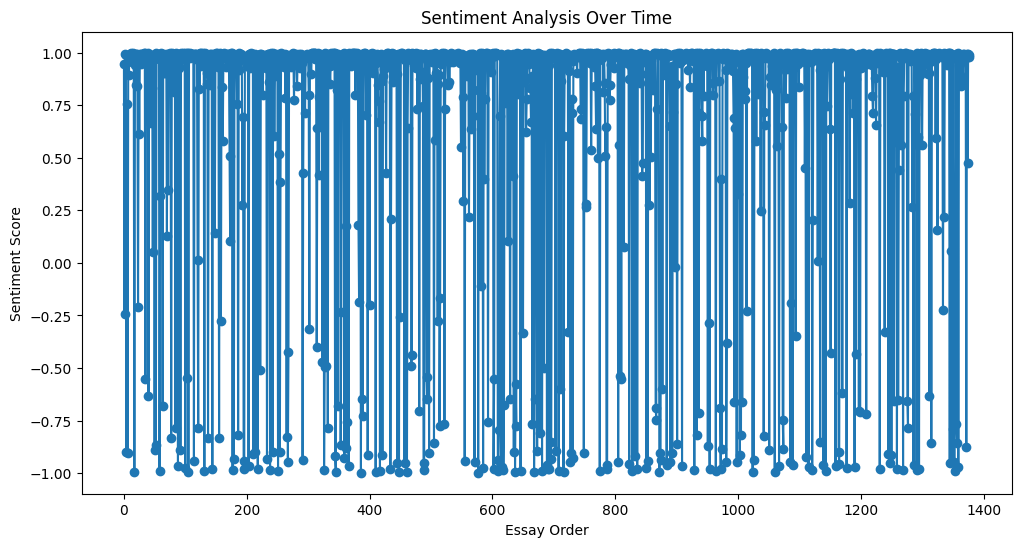

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
sia = SentimentIntensityAnalyzer()
train_essays['sentiment'] = train_essays['text'].apply(lambda text: sia.polarity_scores(text)['compound'])
train_essays['order'] = np.arange(len(train_essays))
plt.figure(figsize=(12, 6))
plt.plot(train_essays['order'], train_essays['sentiment'], marker='o', linestyle='-')
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Essay Order')
plt.ylabel('Sentiment Score')
plt.show()


#  POS tag distribution

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


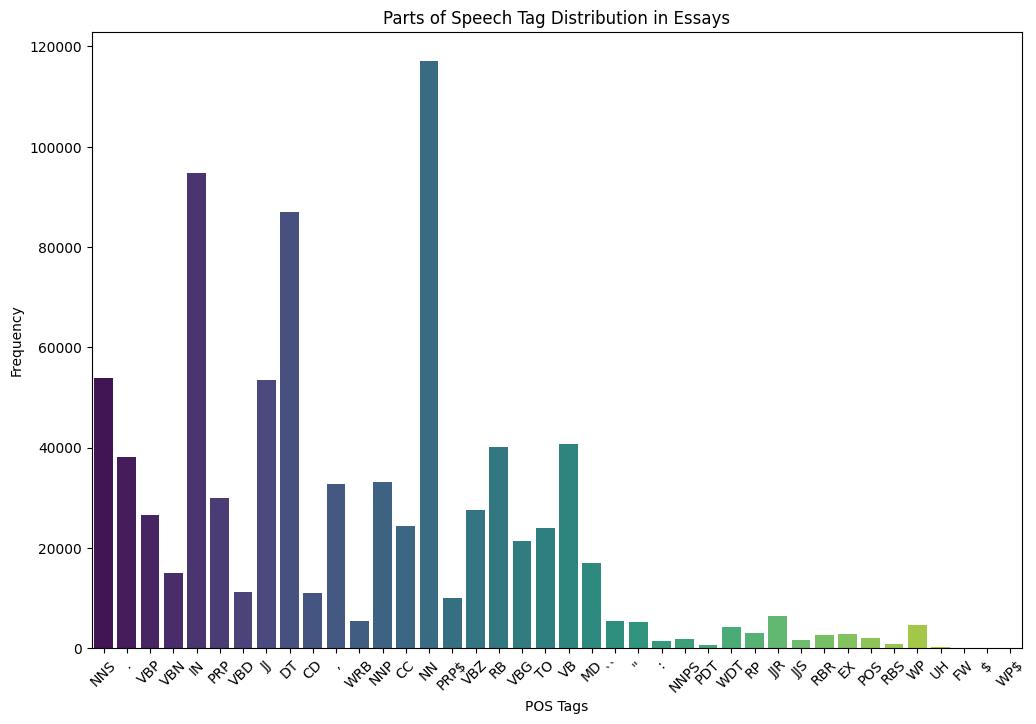

In [ ]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
pos_tags = [pos for essay in train_essays['text'] for pos in pos_tag(word_tokenize(essay))]
tags = [tag for word, tag in pos_tags]
tag_freq = Counter(tags)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(tag_freq.keys()), y=list(tag_freq.values()), palette="viridis")
plt.title('Parts of Speech Tag Distribution in Essays')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Dependency Tree Visualization

In [ ]:
import spacy
from spacy import displacy
import random
nlp = spacy.load('en_core_web_sm')
random_essay = random.choice(train_essays['text'])
doc = nlp(random_essay)
sentence = next(doc.sents)
displacy.render(sentence, style='dep', jupyter=True, options={'distance': 100})

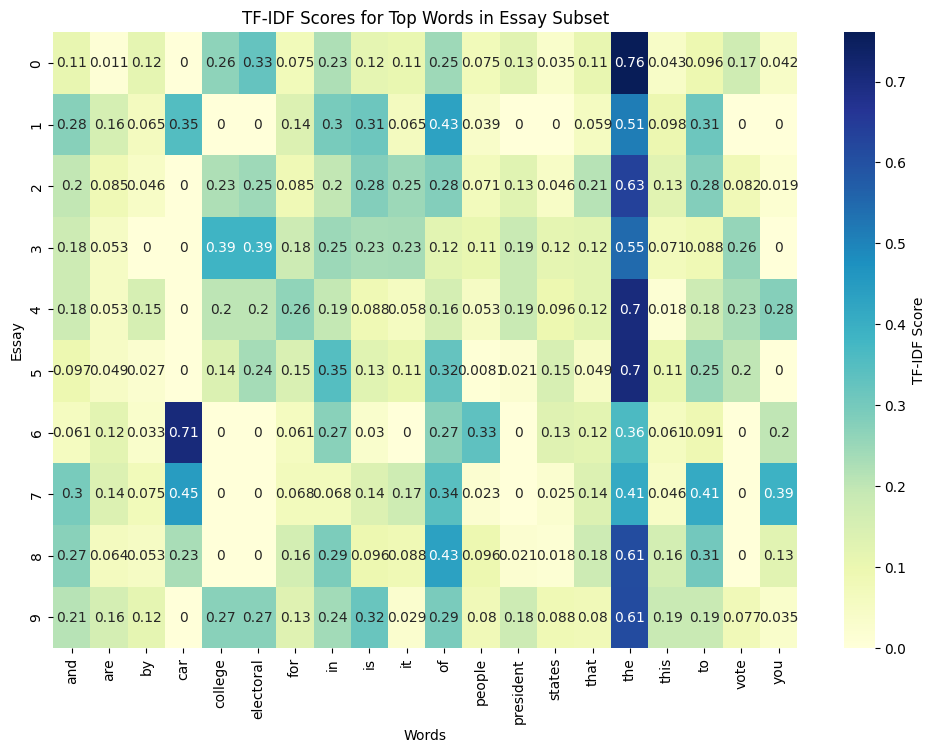

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

subset_essays = train_essays['text'].sample(n=10)  # Adjust 'n' as needed
tfidf = TfidfVectorizer(max_features=20)  # Adjust 'max_features' as needed

# Fit and transform the essays
tfidf_matrix = tfidf.fit_transform(subset_essays)

# Convert to a dense matrix and get feature names
tfidf_dense = tfidf_matrix.todense()
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame for easier plotting
df_tfidf = pd.DataFrame(tfidf_dense, columns=feature_names)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_tfidf, annot=True, cmap="YlGnBu", cbar_kws={'label': 'TF-IDF Score'})
plt.title('TF-IDF Scores for Top Words in Essay Subset')
plt.xlabel('Words')
plt.ylabel('Essay')
plt.show()


In [ ]:
# Load the training prompts dataset
train_prompts_path = '/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv'
train_prompts = pd.read_csv(train_prompts_path)
train_prompts.head()

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [ ]:
from transformers import pipeline, set_seed
import pandas as pd
import random

generator = pipeline('text-generation', model='gpt2')  # For example, using GPT-2
set_seed(42)

def generate_essay(prompt):

    generated_text = generator(prompt, max_length=500, num_return_sequences=1)[0]['generated_text']
    return generated_text

file_path = '/kaggle/input/llm-detect-ai-generated-text/train_prompts.csv'
dataset = pd.read_csv(file_path)

random_prompt = random.choice(dataset['prompt_name'])
essay = generate_essay(random_prompt)
print(essay)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Car-free cities:

(Note that the list isn't complete for cities where people with incomes less than $20,000 live and were previously ineligible for housing subsidy payments:

The US Department of Justice (DOJ) recently published a report about how housing market effects are shifting in the US, and how this impacts other developed nations as well (see the links below).

The first thing we're to do is to find out more about the effects of the US housing market. We'll start with a chart of the US residential rental vacancy rate, and will then move on to chart 3 changes in the US housing market with and without housing (the red line is for a 20,000 person metropolitan area with over 2 million people in the Census Bureau).

(Note that for more detailed information on housing demand in those metropolitan areas, see these links below:

In the next section we'll look at how to make housing affordability a common feature of US communities. We could try to highlight important national characteri